In [1]:
# %load https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/pre.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from google.colab import files
import io, requests, zipfile

'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

from zipfile import ZipFile


from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve, validation_curve

In [2]:
owid_covid_data = pd.read_csv('/Users/apple/Desktop/owid-covid-data.csv')
owid_covid_data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [14]:
from collections import Counter

date_list = owid_covid_data['date']
today_date = '2020-05-14' #here you shall enter today's date yyyy-mm-dd

covid_latest_data = owid_covid_data[:][date_list == today_date] 


In [15]:
covid_latest_data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
52,ABW,Aruba,2020-05-14,101,0,3,0,945.994,0.000,28.099,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
178,AFG,Afghanistan,2020-05-14,5226,259,130,3,134.247,6.653,3.339,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50
232,AGO,Angola,2020-05-14,45,0,2,0,1.369,0.000,0.061,...,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN
281,AIA,Anguilla,2020-05-14,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,ALB,Albania,2020-05-14,880,4,31,0,305.789,1.390,10.772,...,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89


In [16]:
country_list = list(set(covid_latest_data['location'])) #list of all countries
features = list(covid_latest_data.columns[3:]) #list of features that this data provides

print(features)

['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k']


In [17]:
total_cases = list((covid_latest_data['total_cases']))
total_deaths = list((covid_latest_data['total_deaths']))
population = list((covid_latest_data['population']))
hospital_beds_per_100k =  list((covid_latest_data['hospital_beds_per_100k'])) 
handwashing_facilities =  list((covid_latest_data['handwashing_facilities']))
print(len(country_list))
print(len(total_cases))
print(len(total_deaths))
print(len(population))
print(len(hospital_beds_per_100k))
print(len(handwashing_facilities))

208
208
208
208
208
208


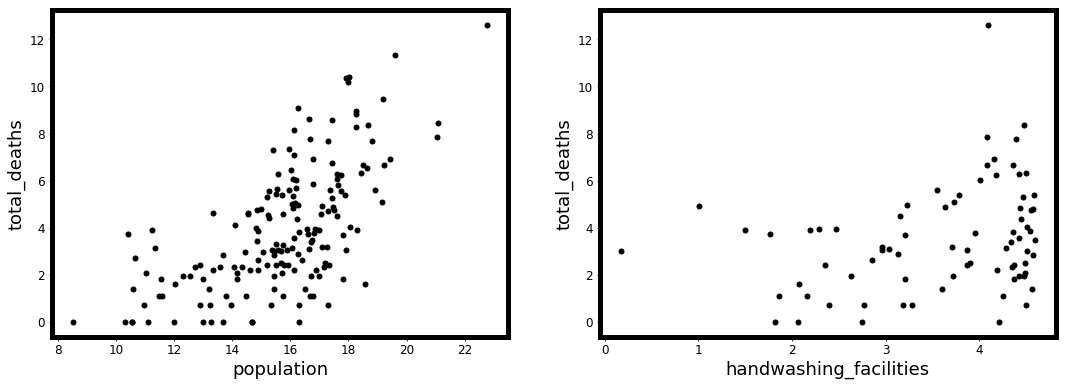

In [21]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121, xlabel = 'population', ylabel='total_deaths', title='')
ax1.scatter(np.log(population), np.log(total_deaths), color='black')


ax2 = fig.add_subplot(122, xlabel = 'handwashing_facilities', ylabel='total_deaths', title='')
ax2.scatter(np.log(handwashing_facilities), np.log(total_deaths), color='black')